In [13]:
# IMPORTING PART
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [4]:
# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


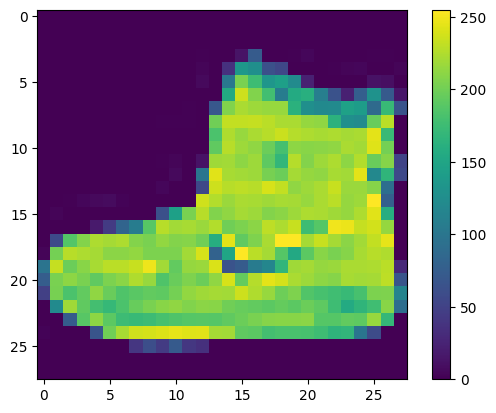

In [14]:
# Display the first image to check
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
# Resize the values to betwen 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train.shape

(60000, 28, 28)

In [16]:
#Build the model
# The Flatten layer just convert the images from 28x28 to one dimensional data(784 pixel)
# The last Dense is for output from 0 tp 9. Every number is a different fashion.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4992 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3740 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3369 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3107 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2927 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2804 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2658 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2559 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2468 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

In [19]:
# Consider the results
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3297 - accuracy: 0.8863 - 367ms/epoch - 1ms/step

Test accuracy: 0.8863000273704529


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 794us/step


In [22]:
predictions[0]

array([1.9446861e-07, 6.2697122e-12, 4.8622972e-09, 4.2333355e-12,
       3.8393299e-08, 1.5990462e-02, 3.2115473e-08, 5.3883488e-03,
       3.3533635e-08, 9.7862089e-01], dtype=float32)

In [23]:

print(class_names[np.argmax(predictions[0])])


Ankle boot


In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

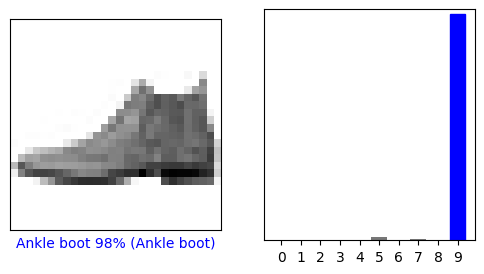

In [25]:
# Confirm the result
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

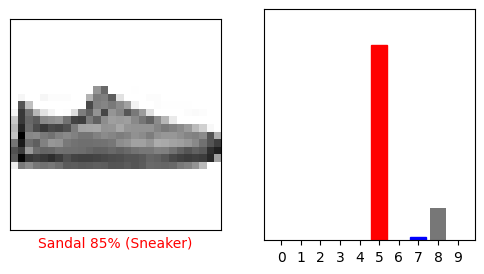

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

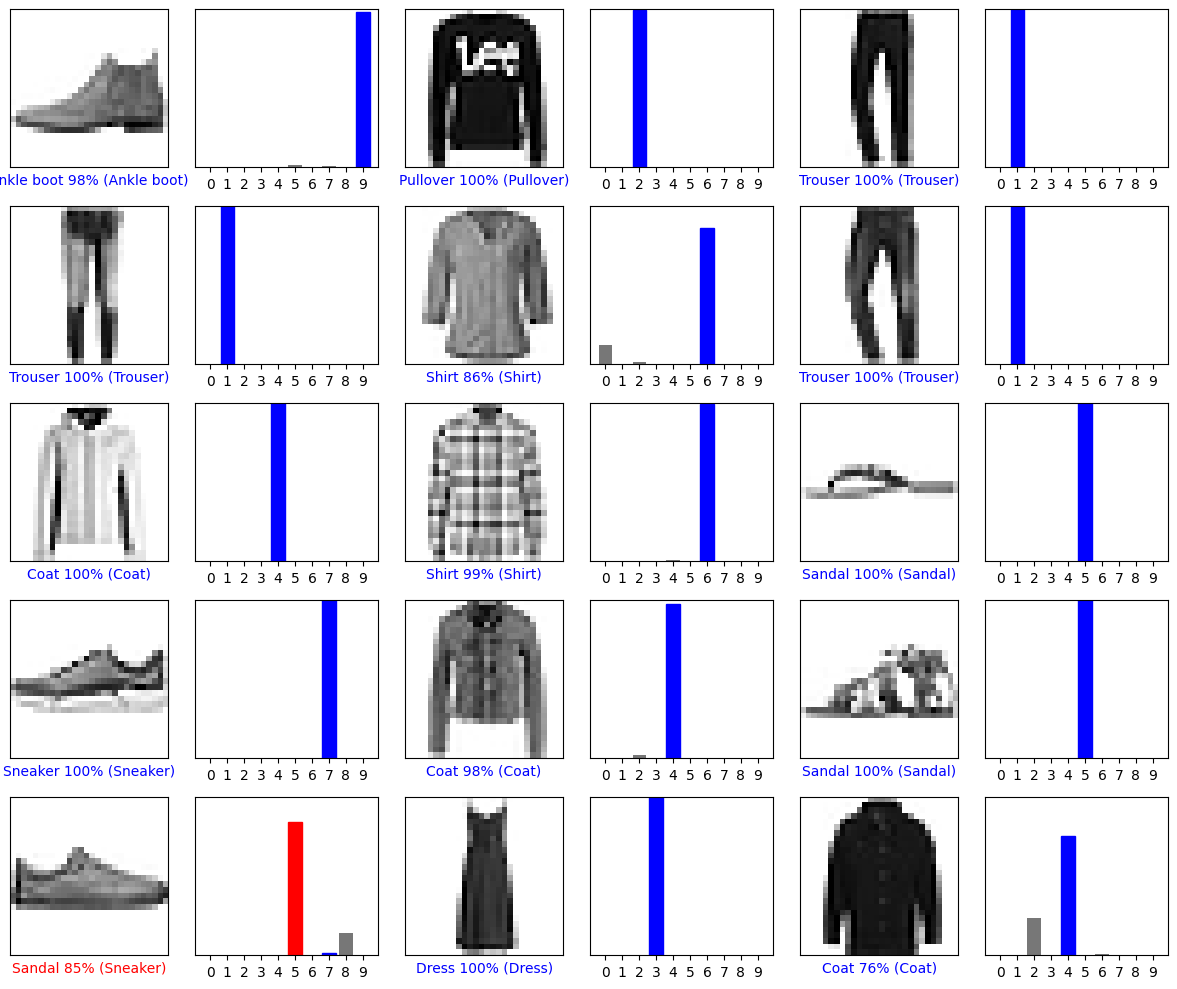

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
  
plt.tight_layout()
plt.show()

In [30]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


1/1 [==============================] - 0s 23ms/step
[[1.55211583e-05 1.91787169e-15 9.96623635e-01 1.17831966e-10
  3.25625041e-03 6.60831524e-14 1.04607236e-04 4.78772242e-19
  3.86578236e-09 3.94965907e-13]]


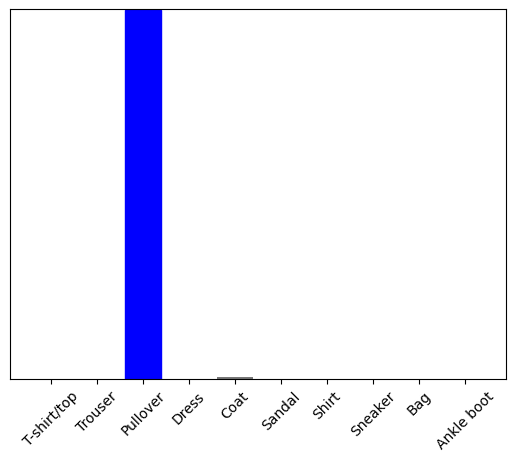

In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
